In [1]:
import numpy as np
import pandas as pd

In [2]:
#use time to see how long it takes to download data
%time df=pd.read_csv('/Users/natashabedford/Funning/dc-residential-properties/DC_Properties.csv', index_col=0)
df.head()

CPU times: user 1.22 s, sys: 101 ms, total: 1.32 s
Wall time: 1.37 s


<string>:2: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.


,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
#change the columns...preference
df.columns=[i.replace(' ', '_').lower() for i in df.columns]

In [4]:
# use this if you don't know how the data is sorted
#randomly selects 5 rows
df.sample(5)

,bathrm,hf_bathrm,heat,ac,num_units,rooms,bedrm,ayb,yr_rmdl,eyb,...,longitude,assessment_nbhd,assessment_subnbhd,census_tract,census_block,ward,square,x,y,quadrant
97640,2,0,Forced Air,Y,1.0,6,3,2014.0,NaN,2015,...,-76.974693,Anacostia,002 B Anacostia,7601.0,007601 1001,Ward 8,5562,-76.974690,38.873491,SE
127813,2,0,Forced Air,Y,NaN,4,2,1900.0,2007.0,1919,...,-76.991065,Trinidad,052 A Trinidad,8802.0,NaN,Ward 5,4070,-76.991068,38.903877,NE
40335,2,1,Warm Cool,Y,2.0,8,3,1978.0,NaN,1984,...,-77.036826,Mt. Pleasant,036 A Mt. Pleasant,2702.0,002702 1004,Ward 1,2595,-77.037193,38.929561,NW
102000,1,1,Hot Water Rad,N,1.0,5,2,1955.0,NaN,1955,...,-76.989129,Congress Heights,016 B Congress Heights,7304.0,007304 2001,Ward 8,5946,-76.989445,38.843694,SE
22678,2,1,Hot Water Rad,N,2.0,8,4,1930.0,1958.0,1976,...,-77.061121,Georgetown,025 F Georgetown,100.0,000100 1002,Ward 2,1282,-77.060462,38.911769,NW


In [5]:
#nbhds.shape

In [6]:
#how big is the data?
df.shape

(158957, 48)

In [7]:
def data_brief(df):
    #create new df for the columns
    columns=pd.DataFrame(df.columns, columns=['Columncd .s'])
    count_rows=df.shape[0] #number of rows
    count_columns= len(df.columns) #number of columns
    index=df.index.name #the index
    
    print(f'\nRows:', count_rows)
    print(f'\nIndex:', index)
    print(f'\nColumms:', count_columns)
    
    return(columns)

data_brief(df)


Rows: 158957

Index: None

Columms: 48


,Columms
0,bathrm
1,hf_bathrm
2,heat
3,ac
4,num_units
5,rooms
6,bedrm
7,ayb
8,yr_rmdl
9,eyb


In [8]:
def df_analysis(df):
    eda_df={} #create an open df
    eda_df['count']= df.count()
    eda_df['null ct']= df.isnull().sum()
    eda_df['null %']= df.isnull().mean()
    eda_df['dtype']= df.dtypes
    eda_df['min']= df.min()
    eda_df['max']= df.max()
    eda_df['mean']= df.mean()
    eda_df['median']= df.median()
    
    return pd.DataFrame(eda_df)

#df_analysis(df)

In [9]:
#drop unwanted columns
df2= df.drop(['bldg_num','usecode', 'source', 'cmplx_num', 'nationalgrid', 
              'latitude', 'longitude', 'census_tract', 'census_block', 'square', 
              'x','y', 'city', 'state', 'qualified','living_gba',
              'gis_last_mod_dttm','intwall','extwall','roof','struct','kitchens',
             'ac','num_units', 'zipcode', 'style'], axis=1)

#use sample instead of head
df2.sample(5)

,bathrm,hf_bathrm,heat,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,...,gba,grade,cndtn,fireplaces,landarea,fulladdress,assessment_nbhd,assessment_subnbhd,ward,quadrant
143036,1,0,Forced Air,3,1,1913.0,2009.0,1919,NaN,2009-10-22 00:00:00,...,NaN,NaN,NaN,0,212,NaN,Eckington,019 B Eckington,Ward 5,NE
93222,1,0,Warm Cool,5,3,1947.0,NaN,1967,2.0,2003-05-08 00:00:00,...,1024.0,Average,Average,0,4493,4017 Q STREET SE,Fort Dupont Park,022 D Fort Dupont Park,Ward 7,SE
103393,2,1,Warm Cool,6,3,2002.0,NaN,2007,3.0,2003-08-06 00:00:00,...,1920.0,Above Average,Excellent,0,2581,1113 WAHLER PLACE SE,Congress Heights,016 C Congress Heights,Ward 8,SE
96709,2,0,Hot Water Rad,6,2,1953.0,NaN,1975,1.5,2013-09-25 00:00:00,...,1539.0,Above Average,Average,2,4648,2922 AKRON PLACE SE,Hillcrest,028 C Hillcrest,Ward 7,SE
325,2,1,Forced Air,6,3,1920.0,2013.0,1967,2.0,2013-06-17 00:00:00,...,1824.0,Above Average,Very Good,0,1760,2226 13TH STREET NW,Old City 2,040 F Old City 2,Ward 1,NW


In [10]:
df2.dropna(inplace=True)

In [11]:
df2=df2.rename(columns={'assessment_nbhd': 'nbhd', 
                        'assessment_subnbhd':'sub_nbhd'})

In [12]:
#data summery of new df
df_analysis(df2)

,count,null ct,null %,dtype,min,max,mean,median
ayb,28900,0,0.0,float64,1754,2015,1922.556574,1923.0
bathrm,28900,0,0.0,int64,0,11,2.333806,2.0
bedrm,28900,0,0.0,int64,0,20,3.482318,3.0
cndtn,28900,0,0.0,object,Average,Very Good,NaN,NaN
eyb,28900,0,0.0,int64,1915,2017,1969.125433,1967.0
fireplaces,28900,0,0.0,int64,0,13,0.715848,0.0
fulladdress,28900,0,0.0,object,1 ADAMS STREET NW,99 RHODE ISLAND AVENUE NE,NaN,NaN
gba,28900,0,0.0,float64,407,14966,1736.508685,1530.0
grade,28900,0,0.0,object,Above Average,Very Good,NaN,NaN
heat,28900,0,0.0,object,Air Exchng,Water Base Brd,NaN,NaN


In [13]:
#create a function to analyze relationships

def tops(df, index, column):
    x= pd.DataFrame(df.groupby(index)[column].max())
    
    return x.sort_values(column, ascending=False)

In [14]:
df2.sort_values('price', ascending=False)

,bathrm,hf_bathrm,heat,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,...,gba,grade,cndtn,fireplaces,landarea,fulladdress,nbhd,sub_nbhd,ward,quadrant
20164,7,3,Ht Pump,31,12,1805.0,2004.0,2000,2.75,2007-05-02 00:00:00,...,14966.0,Exceptional-C,Very Good,6,68880,3124 Q STREET NW,Georgetown,025 F Georgetown,Ward 2,NW
20685,6,5,Warm Cool,17,9,1801.0,2013.0,1986,2.50,2011-07-25 00:00:00,...,10110.0,Exceptional-C,Good,4,155905,1623 28TH STREET NW,Georgetown,025 H Georgetown,Ward 2,NW
21880,9,4,Warm Cool,19,9,1805.0,2013.0,2000,3.00,2014-04-18 00:00:00,...,7910.0,Exceptional-C,Excellent,7,16353,1645 31ST STREET NW,Georgetown,025 F Georgetown,Ward 2,NW
20936,8,2,Hot Water Rad,14,8,1941.0,2013.0,2000,3.00,2010-12-09 00:00:00,...,6937.0,Exceptional-D,Excellent,2,12749,3210 R STREET NW,Georgetown,025 F Georgetown,Ward 2,NW
90982,4,0,Forced Air,16,4,1943.0,2002.0,1964,2.00,2017-03-20 00:00:00,...,3400.0,Average,Good,0,3504,3500 ELY PLACE SE,Fort Dupont Park,022 A Fort Dupont Park,Ward 7,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49321,2,0,Forced Air,9,6,1910.0,2001.0,1960,3.00,1999-10-29 00:00:00,...,2990.0,Good Quality,Average,0,2853,1339 FAIRMONT STREET NW,Columbia Heights,015 E Columbia Heights,Ward 1,NW
54909,5,2,Forced Air,10,6,1906.0,2012.0,1975,3.00,1999-10-26 00:00:00,...,2596.0,Good Quality,Average,0,2520,55 BRYANT STREET NW,Ledroit Park,031 B Ledroit Park,Ward 5,NW
48414,2,0,Forced Air,8,5,1908.0,1988.0,1960,3.00,1999-11-08 00:00:00,...,2281.0,Good Quality,Average,0,2417,1326 IRVING STREET NW,Columbia Heights,015 E Columbia Heights,Ward 1,NW
18568,2,1,Hot Water Rad,8,3,1890.0,2009.0,1976,2.00,2018-05-15 00:00:00,...,2272.0,Superior,Average,0,2400,3014 Q STREET NW,Georgetown,025 F Georgetown,Ward 2,NW


In [15]:
tops(df2,'grade','price').head()

,price
grade,
Exceptional-C,23960287.0
Exceptional-D,11111111.0
Average,11000000.0
Exceptional-B,9000000.0
Exceptional-A,6000000.0


In [16]:
# average housing price
df2['price'].mean()

654932.2866435986

In [17]:
#most expensive home and location

homes_price=pd.DataFrame(df2, columns=['price','nbhd'])
homes_price.max()

price    2.39603e+07
nbhd       Woodridge
dtype: object

In [18]:
#least expensive home
homes_price.min()

price                      1
nbhd     16th Street Heights
dtype: object

In [19]:
#rows of the 5 most expensive homes 
price_df=df2.sort_values('price', ascending=False)
price_df.head()

,bathrm,hf_bathrm,heat,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,...,gba,grade,cndtn,fireplaces,landarea,fulladdress,nbhd,sub_nbhd,ward,quadrant
20164,7,3,Ht Pump,31,12,1805.0,2004.0,2000,2.75,2007-05-02 00:00:00,...,14966.0,Exceptional-C,Very Good,6,68880,3124 Q STREET NW,Georgetown,025 F Georgetown,Ward 2,NW
20685,6,5,Warm Cool,17,9,1801.0,2013.0,1986,2.50,2011-07-25 00:00:00,...,10110.0,Exceptional-C,Good,4,155905,1623 28TH STREET NW,Georgetown,025 H Georgetown,Ward 2,NW
21880,9,4,Warm Cool,19,9,1805.0,2013.0,2000,3.00,2014-04-18 00:00:00,...,7910.0,Exceptional-C,Excellent,7,16353,1645 31ST STREET NW,Georgetown,025 F Georgetown,Ward 2,NW
20936,8,2,Hot Water Rad,14,8,1941.0,2013.0,2000,3.00,2010-12-09 00:00:00,...,6937.0,Exceptional-D,Excellent,2,12749,3210 R STREET NW,Georgetown,025 F Georgetown,Ward 2,NW
90982,4,0,Forced Air,16,4,1943.0,2002.0,1964,2.00,2017-03-20 00:00:00,...,3400.0,Average,Good,0,3504,3500 ELY PLACE SE,Fort Dupont Park,022 A Fort Dupont Park,Ward 7,SE


In [20]:
df2.describe()

,bathrm,hf_bathrm,rooms,bedrm,ayb,yr_rmdl,eyb,stories,price,sale_num,gba,fireplaces,landarea
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,2.890000e+04,28900.000000,28900.000000,28900.000000,28900.000000
mean,2.333806,0.662007,7.502872,3.482318,1922.556574,2004.259273,1969.125433,2.165972,6.549323e+05,2.072664,1736.508685,0.715848,2852.047197
std,1.038695,0.588201,2.319767,1.160678,22.339850,17.183443,10.547762,5.563060,6.048247e+05,1.667003,807.095292,0.982890,2865.397209
min,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,1.000000e+00,1.000000,407.000000,0.000000,216.000000
25%,2.000000,0.000000,6.000000,3.000000,1908.000000,2002.000000,1964.000000,2.000000,3.100000e+05,1.000000,1224.000000,0.000000,1419.000000
50%,2.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,2.000000,5.475000e+05,1.000000,1530.000000,0.000000,1943.000000
75%,3.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.000000,2.000000,8.100000e+05,3.000000,2014.000000,1.000000,3366.000000
max,11.000000,11.000000,31.000000,20.000000,2015.000000,2018.000000,2017.000000,826.000000,2.396029e+07,15.000000,14966.000000,13.000000,155905.000000


## Do some fun EDA

In [169]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline

x= np.random.normal(size=37)
y= np.random.lognormal(size=37)

plt.style.use('bmh')
#plt.figure(figsize=(30,20))
sns.set(style='whitegrid', color_codes= True, font_scale=1.5,
      rc={'figure.figsize':(13.7,11.27)})

In [170]:
#most expensive neighborhood

tops(df2, 'nbhd','price')

,price
nbhd,
Georgetown,23960287.0
Fort Dupont Park,11000000.0
Kalorama,9000000.0
Old City 2,8450000.0
Spring Valley,7525000.0
Berkley,6833333.0
Wesley Heights,6600000.0
Kent,6050000.0
Congress Heights,4739000.0


In [23]:
#how many homes are in each ward?

wards= df2.groupby('ward')['sub_nbhd']
wards.first()

ward
Ward 1     040 D Old City 2
Ward 2     040 D Old City 2
Ward 3      041 B Palisades
Ward 4    011 C Chevy Chase
Ward 5     040 A Old City 2
Ward 6     040 G Old City 2
Ward 7     039 H Old City 1
Ward 8      002 B Anacostia
Name: sub_nbhd, dtype: object

In [24]:
#so this is exactly why i had sub_nbhd and not just the nbhds.  
#what is "old city?"

In [25]:
#most homes per ward
wards.count()

ward
Ward 1    3044
Ward 2    2439
Ward 3    2682
Ward 4    4249
Ward 5    4381
Ward 6    7115
Ward 7    3446
Ward 8    1544
Name: sub_nbhd, dtype: int64

In [26]:
#sort sub_nbhd data
df2.sort_values("sub_nbhd", inplace=True)
bool_series= df2["sub_nbhd"].duplicated()
df2.head()

,bathrm,hf_bathrm,heat,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,...,gba,grade,cndtn,fireplaces,landarea,fulladdress,nbhd,sub_nbhd,ward,quadrant
29767,4,1,Warm Cool,10,5,1940.0,1988.0,1960,2.5,2016-07-13 00:00:00,...,2589.0,Good Quality,Good,2,8782,4328 GARRISON STREET NW,American University,001 A American University,Ward 3,NW
27395,4,1,Forced Air,11,5,1925.0,2014.0,1972,2.0,2012-07-19 00:00:00,...,2944.0,Very Good,Good,1,7200,4617 42ND STREET NW,American University,001 A American University,Ward 3,NW
27393,3,1,Warm Cool,9,3,1988.0,1995.0,2000,2.0,1999-06-18 00:00:00,...,2532.0,Very Good,Good,2,3419,4122 CHESAPEAKE STREET NW,American University,001 A American University,Ward 3,NW
27827,2,1,Warm Cool,8,3,1927.0,2006.0,1969,2.0,2010-06-01 00:00:00,...,1408.0,Good Quality,Good,1,4239,4410 HARRISON STREET NW,American University,001 A American University,Ward 3,NW
28287,2,0,Hot Water Rad,7,3,1926.0,2001.0,1969,2.0,2014-05-19 00:00:00,...,1332.0,Good Quality,Good,0,1680,4415 FESSENDEN STREET NW,American University,001 A American University,Ward 3,NW


In [27]:
df2.groupby('nbhd')['ward'].count().sort_values(ascending=False)

nbhd
Old City 1             5356
Old City 2             2008
Columbia Heights       1858
Chevy Chase            1782
Capitol Hill           1540
Deanwood               1420
Petworth               1323
Georgetown             1251
Brookland              1146
Brightwood             1019
Trinidad                935
Fort Dupont Park        778
Congress Heights        727
Eckington               701
Woodridge               685
Mt. Pleasant            660
16th Street Heights     656
Ledroit Park            578
American University     571
Hillcrest               521
Anacostia               479
Kalorama                356
Randle Heights          344
Marshall Heights        295
Spring Valley           295
Kent                    280
Palisades               272
Lily Ponds              225
Berkley                 223
Burleith                210
Brentwood               210
Wesley Heights          193
Crestwood                 3
Name: ward, dtype: int64

In [28]:
df2.groupby('sub_nbhd')['ward'].count().sort_values(ascending=False)

sub_nbhd
039 K Old City 1        1107
039 L Old City 1         835
009 A Capitol Hill       615
039 F Old City 1         592
042 B Petworth           566
                        ... 
008 B Burleith            34
025 I Georgetown          29
043 D Randle Heights      27
050 A Spring Valley       26
018 D Deanwood            17
Name: ward, Length: 120, dtype: int64

In [29]:
#i want to make a df to show where the neighborhoods are
nbhd= pd.DataFrame(df2, columns=['nbhd','sub_nbhd','ward', 'fulladdress', 'quadrant'])
nbhd.sample(8)

#nbhd= pd.DataFrame(df2, columns= ['sub_nbhd','ward', 'full_address', 'quadrant', 'price'])
#nbhd_grp= nbhd.groupby('sub_nbhd')['price'].sum().reset_index()
#nbhd.sort_values('sub_nbhd', ascending=False)
#nbhd_grp= df2.groupby('sub_nbhd')

#nbhd_grp.first()

,nbhd,sub_nbhd,ward,fulladdress,quadrant
23164,Kent,030 C Kent,Ward 3,5026 DANA PLACE NW,NW
54536,Columbia Heights,015 C Columbia Heights,Ward 1,664 COLUMBIA ROAD NW,NW
72443,Brookland,007 A Brookland,Ward 5,724 EMERSON STREET NE,NE
77962,Woodridge,056 A Woodridge,Ward 5,3812 26TH STREET NE,NE
74013,Brookland,007 B Brookland,Ward 5,4625 12TH STREET NE,NE
14769,Old City 1,039 J Old City 1,Ward 6,1207 G STREET NE,NE
25172,Spring Valley,050 B Spring Valley,Ward 3,3723 48TH STREET NW,NW
19924,Old City 1,039 H Old City 1,Ward 6,213 20TH STREET NE,NE


In [30]:
#group them together
nbhd_grp= nbhd.groupby('sub_nbhd')
nbhd_grp.first()

,nbhd,ward,fulladdress,quadrant
sub_nbhd,,,,
001 A American University,American University,Ward 3,4328 GARRISON STREET NW,NW
001 B American University,American University,Ward 3,4941 46TH STREET NW,NW
001 C American University,American University,Ward 3,4327 44TH STREET NW,NW
002 A Anacostia,Anacostia,Ward 8,1508 V STREET SE,SE
002 B Anacostia,Anacostia,Ward 7,2214 NICHOLSON STREET SE,SE
...,...,...,...,...
054 B Wesley Heights,Wesley Heights,Ward 3,4448 WESTOVER PLACE NW,NW
056 A Woodridge,Woodridge,Ward 5,2635 OTIS STREET NE,NE
056 B Woodridge,Woodridge,Ward 5,3104 CHESTNUT STREET NE,NE


In [31]:
#checking out the Kalorama neighborhood
#sorted by price

df2[df2['nbhd'].str.match('Kalorama')].sort_values('price',
                                                   ascending=False).head()

,bathrm,hf_bathrm,heat,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,...,gba,grade,cndtn,fireplaces,landarea,fulladdress,nbhd,sub_nbhd,ward,quadrant
37604,7,1,Warm Cool,15,6,1926.0,2015.0,2000,3.00,2018-02-28 00:00:00,...,6164.0,Exceptional-B,Excellent,5,10018,2430 WYOMING AVENUE NW,Kalorama,029 A Kalorama,Ward 2,NW
39987,8,4,Warm Cool,12,6,1929.0,2011.0,2000,2.75,2010-06-18 00:00:00,...,8159.0,Exceptional-C,Very Good,4,13500,2340 KALORAMA ROAD NW,Kalorama,029 A Kalorama,Ward 2,NW
37153,8,1,Warm Cool,13,9,1928.0,2017.0,2000,2.75,2017-05-31 00:00:00,...,6441.0,Exceptional-C,Very Good,3,11915,2446 BELMONT ROAD NW,Kalorama,029 A Kalorama,Ward 2,NW
39412,7,2,Warm Cool,13,5,1926.0,2011.0,2000,3.00,2018-05-09 00:00:00,...,6930.0,Exceptional-B,Very Good,2,4631,1901 24TH STREET NW,Kalorama,029 A Kalorama,Ward 2,NW
37034,7,2,Warm Cool,14,8,1754.0,1983.0,1991,3.00,2016-08-23 00:00:00,...,8820.0,Exceptional-C,Good,11,24164,2401 KALORAMA ROAD NW,Kalorama,029 A Kalorama,Ward 2,NW


In [32]:
#which ward is which?
ward_grp= nbhd.groupby('ward')
wards= ward_grp.first()
wards

,nbhd,sub_nbhd,fulladdress,quadrant
ward,,,,
Ward 1,Columbia Heights,015 A Columbia Heights,1518 NEWTON STREET NW,NW
Ward 2,Burleith,008 A Burleith,1820 35TH STREET NW,NW
Ward 3,American University,001 A American University,4328 GARRISON STREET NW,NW
Ward 4,Brightwood,006 A Brightwood,1243 ROCK CREEK FORD ROAD NW,NW
Ward 5,Brentwood,005 A Brentwood,2216 13TH STREET NE,NE
Ward 6,Capitol Hill,009 A Capitol Hill,527 10TH STREET SE,SE
Ward 7,Anacostia,002 B Anacostia,2214 NICHOLSON STREET SE,SE
Ward 8,Anacostia,002 A Anacostia,1508 V STREET SE,SE


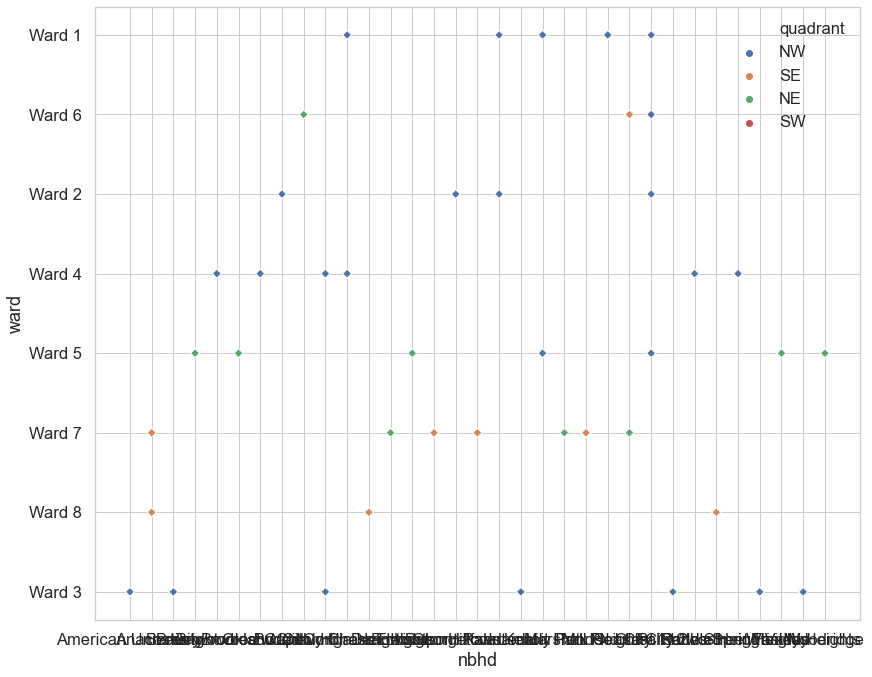

In [171]:
#scatterplot of the neighborhoods

sns.scatterplot(x= 'nbhd', y='ward', hue='quadrant', 
          data= df2, marker= 'D');

#plt.ylim(0, None)
#plt.xlim(0, None)

In [34]:
#sns.lmplot(x='ward', )

Interesting, there is no ward in SW.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


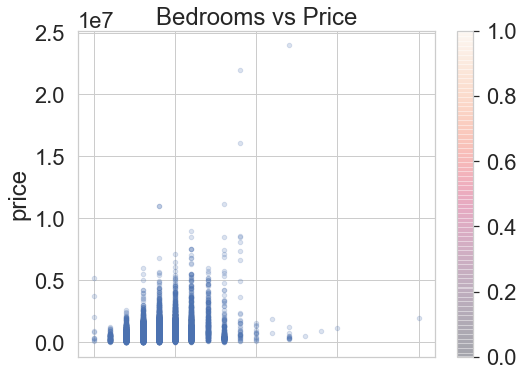

In [168]:
#scatterplot of bedrooms and price
df2.plot(kind='scatter', x='bedrm', y='price', alpha=0.2,
        colormap='Pastel1', figsize=(8,6),
        title= 'Bedrooms vs Price');

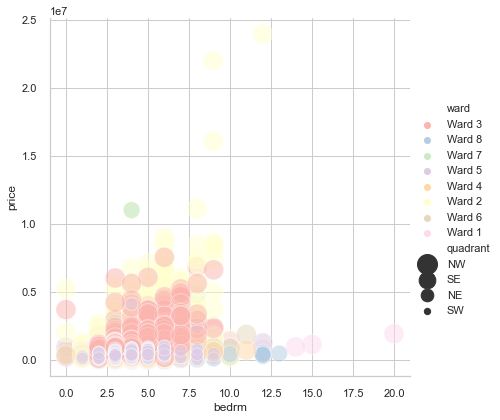

In [157]:
#using seaborn to plot bedrooms vs price. 
sns.relplot(x='bedrm', y='price', hue='ward',
           size='quadrant', sizes=(40,400), alpha=.5,
           palette='Pastel1', height=6, data=df2);

In [37]:
#what ward has the most expensive home
price_ward=df2.groupby('ward')['price'].median()
price_ward

ward
Ward 1     646590.0
Ward 2    1185000.0
Ward 3     925000.0
Ward 4     571000.0
Ward 5     437500.0
Ward 6     620000.0
Ward 7     245000.0
Ward 8     245000.0
Name: price, dtype: float64

In [38]:
wards

,nbhd,sub_nbhd,fulladdress,quadrant
ward,,,,
Ward 1,Columbia Heights,015 A Columbia Heights,1518 NEWTON STREET NW,NW
Ward 2,Burleith,008 A Burleith,1820 35TH STREET NW,NW
Ward 3,American University,001 A American University,4328 GARRISON STREET NW,NW
Ward 4,Brightwood,006 A Brightwood,1243 ROCK CREEK FORD ROAD NW,NW
Ward 5,Brentwood,005 A Brentwood,2216 13TH STREET NE,NE
Ward 6,Capitol Hill,009 A Capitol Hill,527 10TH STREET SE,SE
Ward 7,Anacostia,002 B Anacostia,2214 NICHOLSON STREET SE,SE
Ward 8,Anacostia,002 A Anacostia,1508 V STREET SE,SE


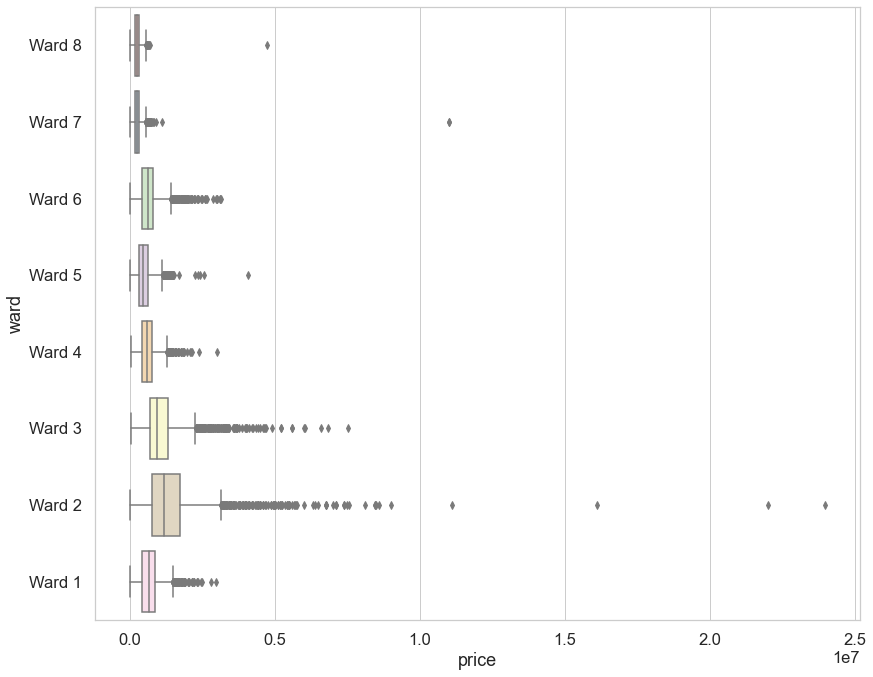

In [172]:
#barplot of price per ward

#find the order
price_order= df2.groupby(by=['ward'])['price'].median().iloc[::-1].index

#put the order into a boxplot
sns.boxplot(x='price', y='ward', data= df2, 
            order=price_order,
           palette='Pastel1');

#plt.figure(figsize=(24,20));

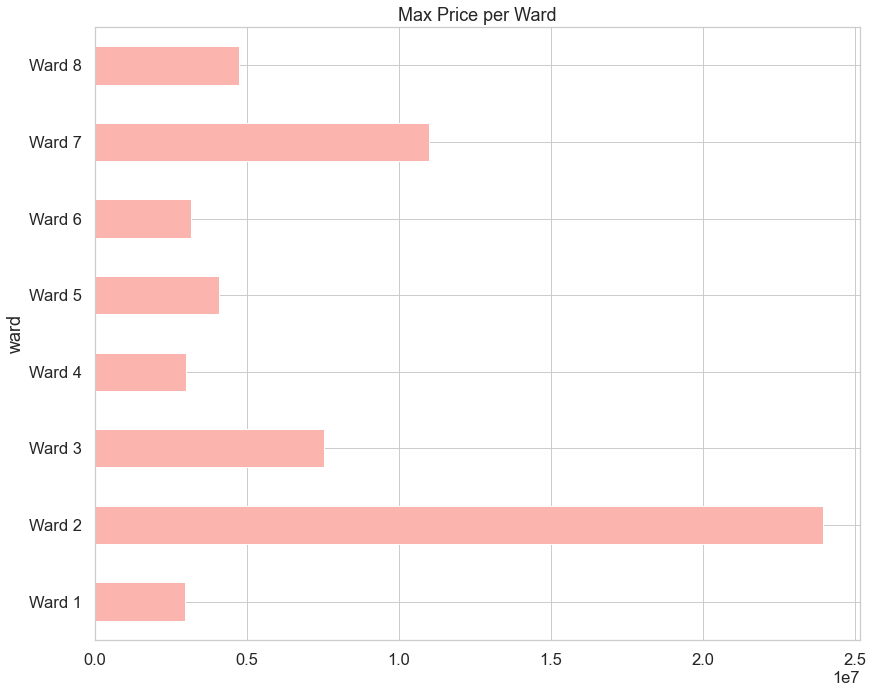

In [173]:
#PLOT what ward has the most expensive home?
df2.groupby('ward')['price'].max().plot(kind='barh', \
                                        title="Max Price per Ward", \
                                        x= 'ward', y= 'price',
                                        cmap= 'Pastel1',
                                       label='big');

In [41]:
med_ward=df2.groupby('ward')['price'].median()

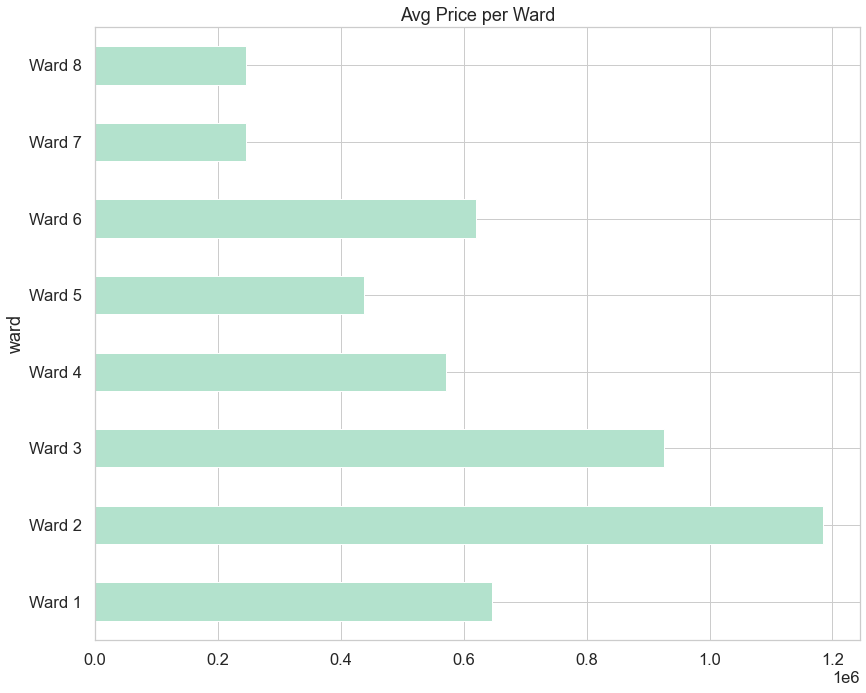

In [174]:
df2.groupby('ward')['price'].median().plot(kind='barh', \
                                        title="Avg Price per Ward", \
                                        x= 'ward', y= 'price',
                                        cmap= 'Pastel2');

In [43]:
df2.set_index('price')

,bathrm,hf_bathrm,heat,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,...,gba,grade,cndtn,fireplaces,landarea,fulladdress,nbhd,sub_nbhd,ward,quadrant
price,,,,,,,,,,,,,,,,,,,,,
1184400.0,4,1,Warm Cool,10,5,1940.0,1988.0,1960,2.50,2016-07-13 00:00:00,...,2589.0,Good Quality,Good,2,8782,4328 GARRISON STREET NW,American University,001 A American University,Ward 3,NW
1230000.0,4,1,Forced Air,11,5,1925.0,2014.0,1972,2.00,2012-07-19 00:00:00,...,2944.0,Very Good,Good,1,7200,4617 42ND STREET NW,American University,001 A American University,Ward 3,NW
569000.0,3,1,Warm Cool,9,3,1988.0,1995.0,2000,2.00,1999-06-18 00:00:00,...,2532.0,Very Good,Good,2,3419,4122 CHESAPEAKE STREET NW,American University,001 A American University,Ward 3,NW
735000.0,2,1,Warm Cool,8,3,1927.0,2006.0,1969,2.00,2010-06-01 00:00:00,...,1408.0,Good Quality,Good,1,4239,4410 HARRISON STREET NW,American University,001 A American University,Ward 3,NW
795000.0,2,0,Hot Water Rad,7,3,1926.0,2001.0,1969,2.00,2014-05-19 00:00:00,...,1332.0,Good Quality,Good,0,1680,4415 FESSENDEN STREET NW,American University,001 A American University,Ward 3,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729000.0,4,0,Forced Air,10,6,1927.0,2015.0,1964,2.00,2018-06-12 00:00:00,...,2034.0,Average,Good,0,2906,2142 30TH STREET NE,Woodridge,056 D Woodridge,Ward 5,NE
355000.0,2,1,Forced Air,8,4,1927.0,1984.0,1957,1.50,2005-09-15 00:00:00,...,1508.0,Above Average,Average,0,7126,3023 DOUGLAS STREET NE,Woodridge,056 D Woodridge,Ward 5,NE
382609.0,3,0,Forced Air,7,5,1927.0,2008.0,1964,1.75,2007-11-30 00:00:00,...,1729.0,Average,Good,1,8337,3047 DOUGLAS STREET NE,Woodridge,056 D Woodridge,Ward 5,NE


In [44]:
df2.corr()

,bathrm,hf_bathrm,rooms,bedrm,ayb,yr_rmdl,eyb,stories,price,sale_num,gba,fireplaces,landarea
bathrm,1.000000,0.091674,0.627774,0.643595,0.019378,0.105670,0.369067,0.016594,0.478453,0.033474,0.664008,0.323764,0.308770
hf_bathrm,0.091674,1.000000,0.107172,0.125967,-0.046838,0.036367,0.281119,0.030868,0.294055,0.002992,0.259109,0.252125,0.150269
rooms,0.627774,0.107172,1.000000,0.679926,0.029107,0.002043,0.180071,0.019767,0.333632,-0.034648,0.667684,0.250495,0.294609
bedrm,0.643595,0.125967,0.679926,1.000000,-0.000437,0.039898,0.217567,0.019235,0.347708,-0.023032,0.633087,0.239889,0.303938
ayb,0.019378,-0.046838,0.029107,-0.000437,1.000000,0.087980,0.186923,-0.018659,-0.154585,0.022503,-0.030361,-0.141191,0.254659
yr_rmdl,0.105670,0.036367,0.002043,0.039898,0.087980,1.000000,0.192874,-0.002770,0.053331,0.152992,-0.021864,-0.089801,-0.008213
eyb,0.369067,0.281119,0.180071,0.217567,0.186923,0.192874,1.000000,0.029507,0.490661,0.090255,0.352572,0.328570,0.166501
stories,0.016594,0.030868,0.019767,0.019235,-0.018659,-0.002770,0.029507,1.000000,0.043205,0.009658,0.034900,0.027550,-0.008022
price,0.478453,0.294055,0.333632,0.347708,-0.154585,0.053331,0.490661,0.043205,1.000000,0.147683,0.607680,0.510100,0.367954
sale_num,0.033474,0.002992,-0.034648,-0.023032,0.022503,0.152992,0.090255,0.009658,0.147683,1.000000,-0.092993,-0.069403,-0.064108


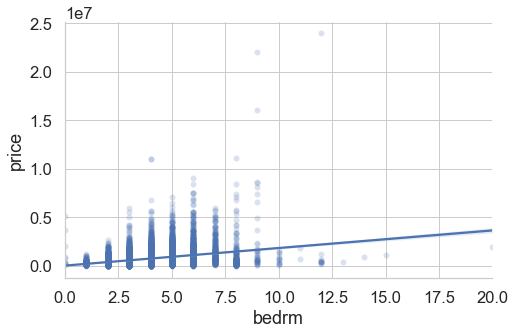

In [175]:
sns.lmplot(x='bedrm', y='price', data= df2,
          aspect= 1.5, scatter_kws={'alpha':0.2});

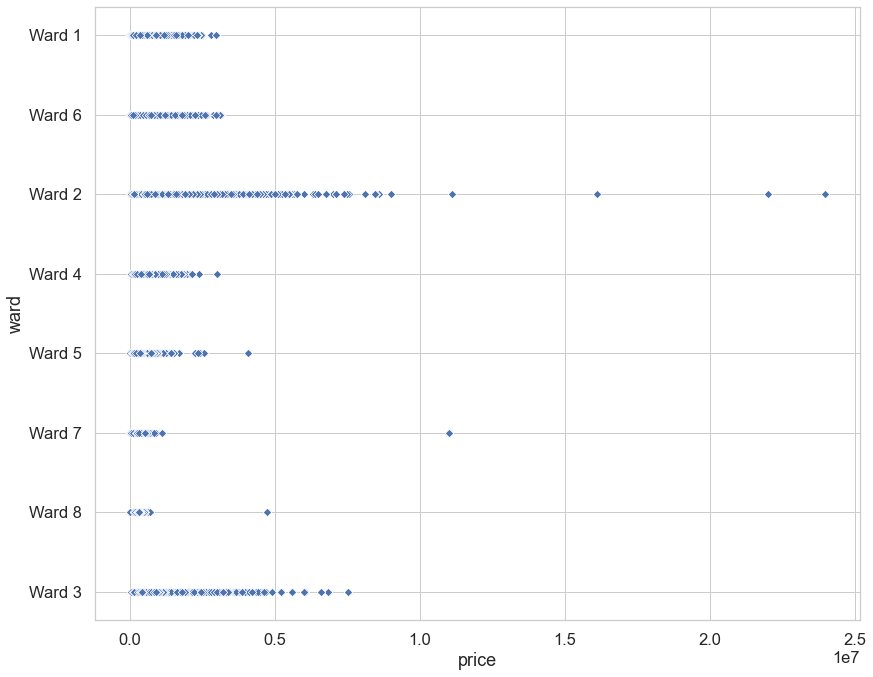

In [176]:
sns.scatterplot(x='price', y='ward', data=df2, marker='D');

In [47]:
mean_price= df2.price.mean()
mean_price

654932.2866435986

In [48]:
mean_bdrm= df2.bedrm.mean()
mean_bdrm

3.482318339100346

In [49]:
#cost of a bedroom 

In [50]:
#how are the different grades represented?

#drop 'No Data' row
#grades=df2.groupby('grade')['price']
grades=df.groupby(['grade']).price.count()[lambda x: x>= 4]

#sort out the values
grades.sort_values(ascending=False)
#grades.count().sort_values(ascending=False)

grade
Average          19664
Above Average    17321
Good Quality     11752
Very Good         5008
Excellent         1825
Superior          1523
Exceptional-A      473
Exceptional-B      168
Fair Quality        83
Exceptional-C       44
Exceptional-D       32
Low Quality          4
Name: price, dtype: int64

In [ ]:
#does cost matter with this information?

sns.violinplot(x='grade', y='price', data=df2);

In [52]:
#i don't think i can use this data.  That sucks!
#5there's something else to measure the quality of the property, right?

condition=df.groupby('cndtn')['price']
condition.count().sort_values(ascending=False)

cndtn
Good         25711
Average      24013
Very Good     6681
Excellent      889
Fair           509
Poor            93
Default          4
Name: price, dtype: int64

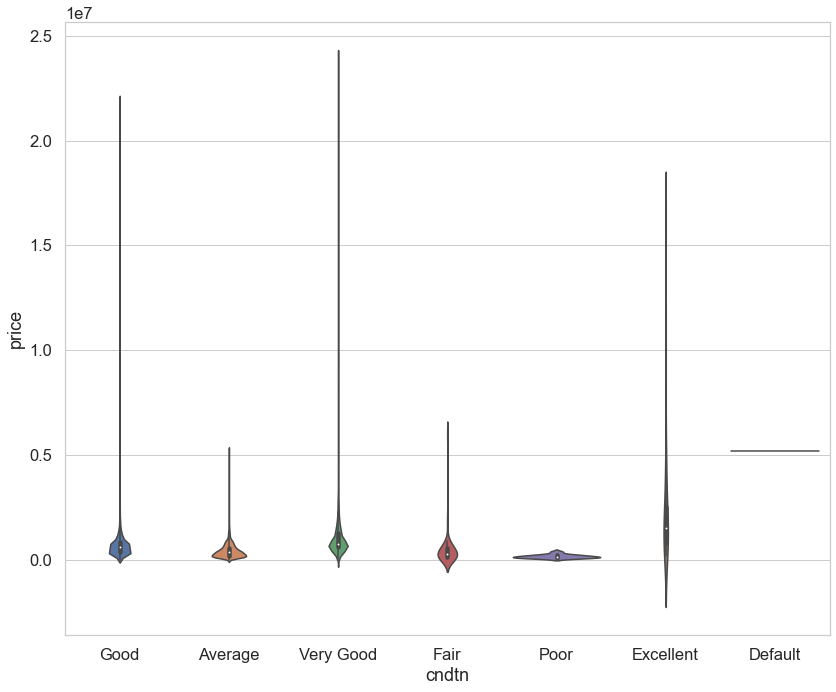

In [190]:
#does the condition affect the price?
sns.violinplot(x='cndtn', y='price', data=df2);

In [ ]:
#use a swarmplot to show multiple organized data points of the same value
sns.stripplot(x='cndtn', y='price', data=df2);

In [189]:
#check out the Gross building area in sq ft (gba)
print(df2.gba.dtype)

#average GBA
df2['gba'].mean()

float64


1736.5086851211072

In [55]:
#largest home
df2['gba'].max()

14966.0

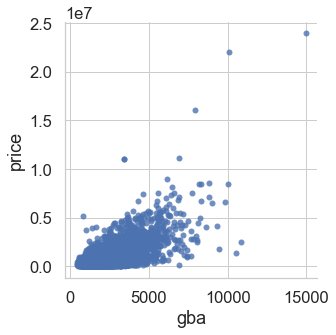

In [180]:
#plot 
sns.lmplot(x='gba', y='price', data=df2, ci=None, fit_reg=False);

In [57]:
#average price per every 100 square feet

In [58]:
all_nums=df2.drop(df2.select_dtypes(exclude='number'), axis=1)
all_nums.sample(5)

,bathrm,hf_bathrm,rooms,bedrm,ayb,yr_rmdl,eyb,stories,price,sale_num,gba,fireplaces,landarea
55437,2,1,6,3,1964.0,2016.0,1979,1.0,700000.0,5,1196.0,0,7000
19551,3,1,9,4,1875.0,2013.0,1992,3.0,4000000.0,5,3078.0,3,3574
19948,3,1,10,4,1925.0,2012.0,1967,2.0,799900.0,4,1240.0,0,1640
62034,2,0,8,3,1933.0,1961.0,1954,2.0,173500.0,1,1524.0,0,1620
27418,4,0,10,5,1939.0,2008.0,1969,2.0,950000.0,7,1818.0,1,4558


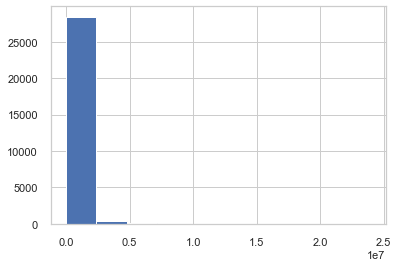

In [59]:
all_nums['price'].hist();

In [60]:
#use sklearn.LocalOutlierFactor, which dynamically removes outliers
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(contamination='auto')

In [61]:
lof

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [62]:
all_nums= all_nums[pd.Series(lof.fit_predict(all_nums.values)).apply(
    lambda x: True if x==1 else False).values]
all_nums

,bathrm,hf_bathrm,rooms,bedrm,ayb,yr_rmdl,eyb,stories,price,sale_num,gba,fireplaces,landarea
29767,4,1,10,5,1940.0,1988.0,1960,2.50,1184400.0,2,2589.0,2,8782
27395,4,1,11,5,1925.0,2014.0,1972,2.00,1230000.0,1,2944.0,1,7200
27393,3,1,9,3,1988.0,1995.0,2000,2.00,569000.0,1,2532.0,2,3419
27827,2,1,8,3,1927.0,2006.0,1969,2.00,735000.0,1,1408.0,1,4239
28287,2,0,7,3,1926.0,2001.0,1969,2.00,795000.0,6,1332.0,0,1680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82533,4,0,10,6,1927.0,2015.0,1964,2.00,729000.0,6,2034.0,0,2906
81341,2,1,8,4,1927.0,1984.0,1957,1.50,355000.0,1,1508.0,0,7126
81338,3,0,7,5,1927.0,2008.0,1964,1.75,382609.0,1,1729.0,1,8337
82351,3,0,6,3,1929.0,2005.0,1964,1.50,225000.0,1,1593.0,0,4618


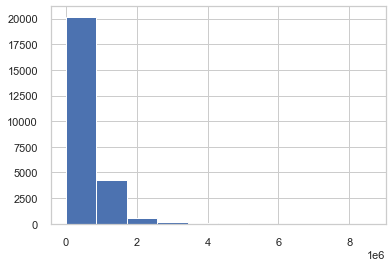

In [63]:
all_nums['price'].hist();

In [64]:
#square footage and it's price
#highest price and it's square footage
df2.groupby('gba')['price'].max().sort_values(ascending=False)

gba
14966.0    23960287.0
10110.0    22000000.0
7910.0     16100000.0
6937.0     11111111.0
3440.0     11000000.0
              ...    
592.0         65000.0
1393.0        65000.0
492.0         45000.0
627.0         42000.0
3465.0        33232.0
Name: price, Length: 3291, dtype: float64

In [65]:
#most square footage and it's price
df2.groupby('price')['gba'].max().sort_values(ascending=False)

price
23960287.0    14966.0
2500000.0     10866.0
1325000.0     10520.0
22000000.0    10110.0
8500000.0     10001.0
               ...   
195996.0        624.0
428500.0        624.0
195500.0        535.0
135352.0        496.0
282550.0        490.0
Name: gba, Length: 4944, dtype: float64

In [66]:
#which ward has the biggest homes?
df2.groupby('ward')['gba'].max().sort_values(ascending=False)

ward
Ward 2    14966.0
Ward 3     9817.0
Ward 4     9470.0
Ward 7     6918.0
Ward 1     5860.0
Ward 6     5656.0
Ward 5     5481.0
Ward 8     4786.0
Name: gba, dtype: float64

# Build a Linear Regression Model with sklearn

In [67]:
#create X and y
feature_cols= ['bedrm']

#pandas DF equilvalent to X= df2[['bedrm']]
X= df2[feature_cols]
#pandas Series equilvalent to y= df2['price']
y= df2.price

In [68]:
#check data types
print((type(X))) #pandas dataframe
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [69]:
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [70]:
#check X's shape (observations, # of features)
print((X.shape))

(28900, 1)


In [71]:
#check y's shape
print((y.shape))

(28900,)


Import the class

In [72]:
from sklearn.linear_model import LinearRegression

Instantiate the estimator

estimator= model
instantiate= make and instance of

In [73]:
#make and instance of a LinearRegression object
lr= LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [74]:
#possible parameters
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fit the model with data (model training)

In [75]:
lr.fit(X,y) #now a fitted model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the respose for a new observation (out of sample data).  It uses the information it learned during the model training process.

In [76]:
#one dimensional arrays must be reshaped
lr.predict(np.array([0]).reshape(1,-1))

array([23973.90751613])

In [77]:
#how much is it per bedroom in dc?
X_new= [[3]]
lr.predict(X_new)

array([567541.42577795])

In [78]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#print the coefficients
 #intercept = the value of y when all independent variables are 0
print(lr.intercept_) 

 #an increase of bedrooms is associated w increasing the price of homes
 #a bedroom increase is associated with a price increase of $181,189   
print(lr.coef_)

23973.90751613339
[181189.17275394]


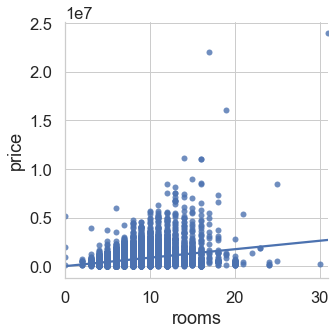

In [179]:
#'rooms' according to price.  I don't know what constitutes a room yet
sns.lmplot(x='rooms', y='price', data= df2, ci=None);
#plt.xlim(10, 25);
#plt.ylim(10_000, 300_000_000 );

In [81]:
#add more features

feature_cols=['rooms', 'bathrm']

In [82]:
#create X and y
X= df2[feature_cols]
y= df2.price

#instatiate and fit
lr= LinearRegression()
lr.fit(X,y)

#print the coefficients
print(lr.intercept_)
print(lr.coef_)

-55839.65504966758
[ 14317.29664438 258526.64657649]


In [83]:
#pair the feature names witht the coefficients
list(zip(feature_cols, lr.coef_))

[('rooms', 14317.296644380045), ('bathrm', 258526.64657649022)]

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28900 entries, 29767 to 81955
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrm       28900 non-null  int64  
 1   hf_bathrm    28900 non-null  int64  
 2   heat         28900 non-null  object 
 3   rooms        28900 non-null  int64  
 4   bedrm        28900 non-null  int64  
 5   ayb          28900 non-null  float64
 6   yr_rmdl      28900 non-null  float64
 7   eyb          28900 non-null  int64  
 8   stories      28900 non-null  float64
 9   saledate     28900 non-null  object 
 10  price        28900 non-null  float64
 11  sale_num     28900 non-null  int64  
 12  gba          28900 non-null  float64
 13  grade        28900 non-null  object 
 14  cndtn        28900 non-null  object 
 15  fireplaces   28900 non-null  int64  
 16  landarea     28900 non-null  int64  
 17  fulladdress  28900 non-null  object 
 18  nbhd         28900 non-null  object 
 19  

## Work with GBA Data

In [85]:
#what's the range need to be like on my graph?
print(df2.gba.max())
print(df2.gba.min())

14966.0
407.0


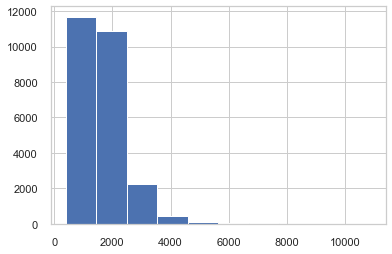

In [86]:
all_nums['gba'].hist();

Text(0, 0.5, 'Price')

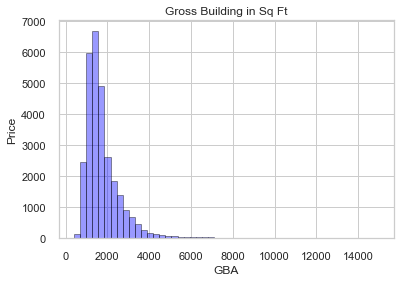

In [87]:
#histogram before removing outliers

sns.distplot(df2['gba'], hist=True, kde=False,
              color='blue', 
             hist_kws={'edgecolor': 'black'});

#add labels
plt.title('Gross Building in Sq Ft')
plt.xlabel('GBA')
plt.ylabel('Price')

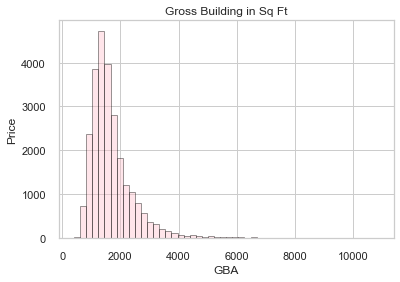

In [88]:
#histogram after removing the outliers

sns.distplot(all_nums['gba'], hist=True, kde=False,
              color= 'pink', 
             hist_kws={'edgecolor': 'black'});

#add labels
plt.title('Gross Building in Sq Ft')
plt.xlabel('GBA')
plt.ylabel('Price');

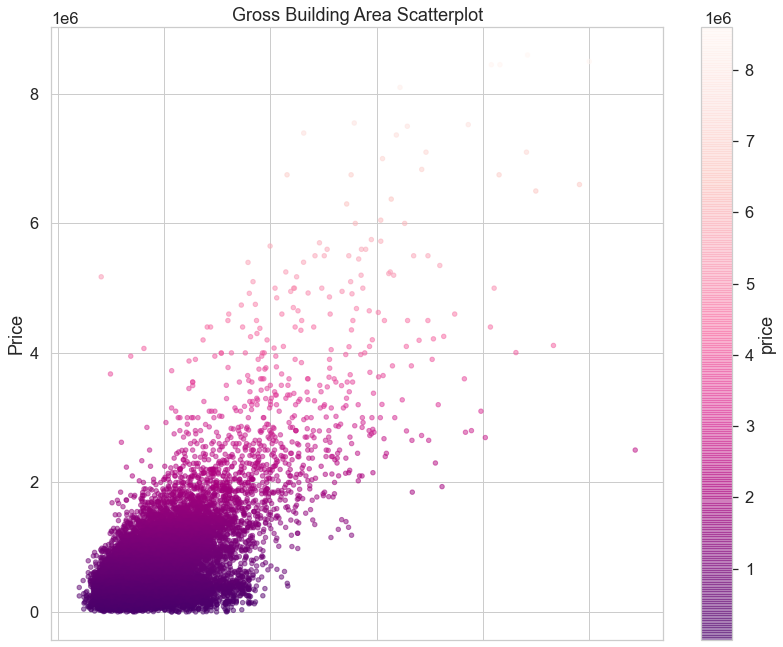

In [178]:
#create a scatterplot to visualize the comparison

#pal=sns.color_palette('Pastel1', len(all_nums))
#rank= all_nums

all_nums.plot(kind='scatter', x='gba',  y='price', alpha=0.5,
             c='price', colormap='RdPu_r',
             #palette=np.array(pal[::-1])[rank]
             );

plt.title('Gross Building Area Scatterplot')
plt.xlabel('Gross Building Area')
plt.ylabel('Price');

In [90]:
#test by running a correlation matrix
all_nums.corr()

,bathrm,hf_bathrm,rooms,bedrm,ayb,yr_rmdl,eyb,stories,price,sale_num,gba,fireplaces,landarea
bathrm,1.000000,0.098776,0.614585,0.631989,0.006562,0.147211,0.384104,0.042383,0.519834,0.058949,0.652401,0.329717,0.330920
hf_bathrm,0.098776,1.000000,0.124221,0.141418,-0.050237,0.058174,0.274440,0.038101,0.299983,0.011432,0.267581,0.246338,0.136895
rooms,0.614585,0.124221,1.000000,0.664945,0.019910,0.010482,0.199068,0.042364,0.366174,-0.010662,0.650062,0.262549,0.314966
bedrm,0.631989,0.141418,0.664945,1.000000,-0.005476,0.066374,0.233668,0.037861,0.382040,-0.000446,0.625017,0.249015,0.332715
ayb,0.006562,-0.050237,0.019910,-0.005476,1.000000,0.120639,0.180631,-0.033023,-0.161759,0.020943,-0.049126,-0.152999,0.295006
yr_rmdl,0.147211,0.058174,0.010482,0.066374,0.120639,1.000000,0.271476,-0.004083,0.074765,0.208230,-0.023498,-0.116753,0.000539
eyb,0.384104,0.274440,0.199068,0.233668,0.180631,0.271476,1.000000,0.059365,0.525403,0.103490,0.369353,0.324067,0.179982
stories,0.042383,0.038101,0.042364,0.037861,-0.033023,-0.004083,0.059365,1.000000,0.092077,0.004443,0.069737,0.061218,-0.007846
price,0.519834,0.299983,0.366174,0.382040,-0.161759,0.074765,0.525403,0.092077,1.000000,0.165798,0.670247,0.553710,0.354659
sale_num,0.058949,0.011432,-0.010662,-0.000446,0.020943,0.208230,0.103490,0.004443,0.165798,1.000000,-0.064303,-0.055899,-0.052615


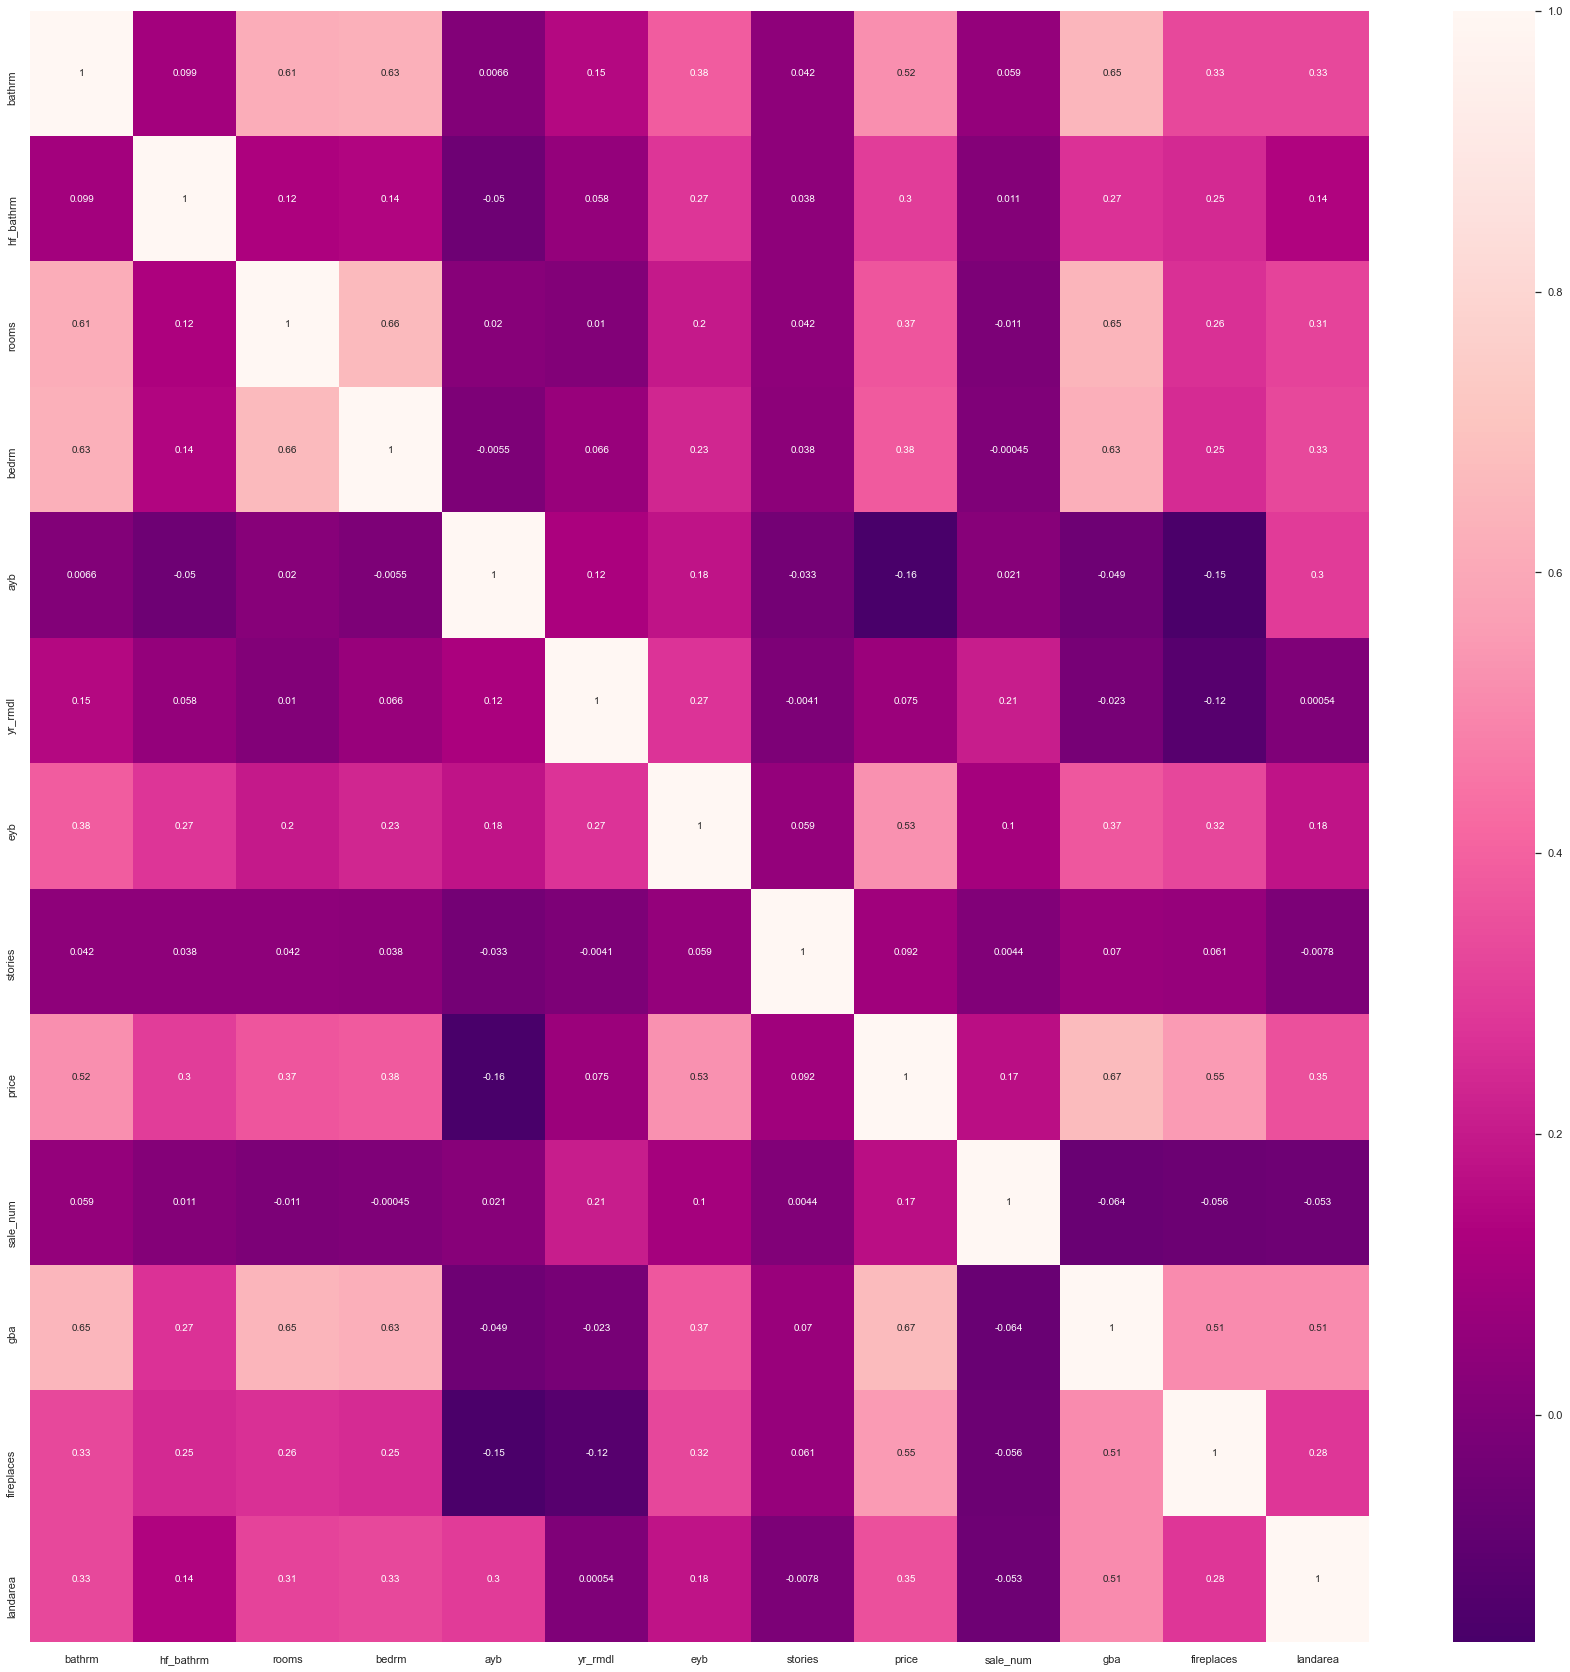

In [91]:
#use correlation matrix

corrmat= all_nums.corr()
top_corr_feats= corrmat.index
plt.figure(figsize=(30,30))

g= sns.heatmap(all_nums[top_corr_feats].corr(), annot=True,
               cmap='RdPu_r')

In [136]:
#create a pairplot
#sns.pairplot(all_nums, palette='Pastel1')

In [92]:
#create a feature matrix (X)
feature_cols= ['gba'] #feat calls
X= all_nums[feature_cols] 

#create response vector (y)
y=all_nums.price

#create X and y
#feature_cols= ['bedrm']

#pandas DF equilvalent to X= df2[['bedrm']]
#X= df2[feature_cols]
#pandas Series equilvalent to y= df2['price']
#y= df2.price

In [93]:
#check data types 

print((type(X)))
print((type(X.values)))
print()
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [94]:
#check the shapes, they must match up
#number of observations, number of features

print((X.shape))
print((y.shape)) #datatype is a tuple

(25439, 1)
(25439,)


#### Import linear regression, instatiate, fit and preview predictions.

In [95]:
#import the class
from sklearn.linear_model import LinearRegression

#instantiate the model
lr= LinearRegression()

type(lr)

sklearn.linear_model.base.LinearRegression

In [96]:
#train the model on the entire data set
lr.fit(X, y)

#predict the response values for the observations in X ('test the model')
lr.predict(X)

array([1106791.25314243, 1287932.00783677, 1077706.68126193, ...,
        667971.3966998 ,  598576.62870422,  379166.7004829 ])

In [97]:
#train the model (fit the model with data)
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
#reshape.  one dimensional arrays must be reshaped 
lr.predict(np.array([0]).reshape(1,-1))

array([-214260.6170087])

In [99]:
#store the predicted response values
y_pred= lr.predict(X)

In [100]:
all_nums['gba'].min()

407.0

In [101]:
X_new=[[6000],[5000]]
lr.predict(X_new)

array([2847273.26514918, 2337017.61812287])

"if the square footage is 700, the price will be be $142,917

In [102]:
#print the coefficients
print(lr.intercept_)
print(lr.coef_)

-214260.6170086998
[510.25564703]


#### Explore the intercept and coefficients of the linear models

In [103]:

#use the predict method

lr.predict([[2000]])

array([806250.67704393])

### Try with Train Test Split

In [111]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [112]:
#20% of the data will be held for testing
#create train and test

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1,
                                                   test_size=0.3)

#print the first element of each object

print('X train:', X_train.head(1))
print('X test:', X_test.head(1))
print('y_train:', y_train.head(1))
print('y_test:', y_test.head(1))

X train:           gba
12841  1278.0
X test:          gba
99241  960.0
y_train: 12841    1275000.0
Name: price, dtype: float64
y_test: 99241    307000.0
Name: price, dtype: float64


In [113]:
#X pre split
print(X.shape)
print(y.shape)

#y post split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25439, 1)
(25439,)
(17807, 1) (17807,)
(7632, 1) (7632,)


In [114]:
#y pre split
print(y.shape)

#y post split
print(y_train.shape)
print(y_test.shape)

(25439,)
(17807,)
(7632,)


#### Fit the model with the training data

In [115]:
gba_model= lr.fit(X_train, y_train)
predictions= lr.predict(X_test)

In [116]:
predictions[0:5]

array([ 275572.39047941,  500165.47638556, 1451113.01966544,
        351117.33755693,  484852.31143741])

In [216]:
y_pred= lr.predict(X_test)

# Statistics on the Model

## Regressor Metrics

In [215]:
#Mean Absolute Error (MAE)
#calculates the difference btwn each data points predicted y-value
#and the real y_value, the mean every difference

#import library
#from sklearn import median_absolute_error

#create instance
print(metrics.mean_absolute_error(y_train, lr.predict(X_train)))
print(metrics.mean_absolute_error(y_test, lr.predict(X_test)))

283790.92863553384
287154.32207898196


In [217]:
#Mean Square Error (MSE)
#calculates the square of each data points predicted y-value
#and real y-value, then averages the squares
print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

178247453289.54745
182521700486.41946


In [229]:
#Root Mean Square Error (RMSE)

from math import sqrt

rmse_train= sqrt(mean_squared_error(y_train, lr.predict(X_train)))
rmse_test= sqrt(mean_squared_error(y_test, lr.predict(X_test)))

print(rmse_train)
print(rmse_test)
#print(metrics.root_mean_squared_error(y_train, lr.predict(X_train)))
#print(metrics.root_mean_squared_error(y_test, lr.predict(X_test)))

422193.6206168296
427225.58500916057


#### Work with Patsy

In [118]:
import patsy

In [119]:
y, X= patsy.dmatrices('price ~ landarea + gba', data=all_nums, return_type='dataframe')

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=99)

In [120]:
X= all_nums[['landarea', 'gba']]
y= all_nums['price']

In [121]:
# Train the model on the training set
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
#test the model on the testing set and check the accuracy

y_pred= lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

178247453289.54745
182521700486.41946


In [123]:
print(metrics.mean_squared_error(y_test, y_test.apply(np.mean,
                                                     result_type='broadcast')))

326983513047.3994


In [124]:
#took the first 5 rows of the price data
first_five= all_nums['price'][:5]
first_five

29767    1184400.0
27395    1230000.0
27393     569000.0
27827     735000.0
28287     795000.0
Name: price, dtype: float64

In [125]:
#the degree of freedom
np.std(first_five, ddof=1) 

290498.901891212

In [126]:
#the variance on the price
first_five.var()

84389612000.0

In [127]:
np.sqrt(np.mean(np.square(y-y_pred)))

ValueError: Length of passed values is 6360, index implies 25439.